<a href="https://colab.research.google.com/github/suckgitariuses/PCVK_Ganjil_2025/blob/main/Modul3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRAKTIKUM**

**Access the image folder on your Google Drive with the following code:**

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**Transformasi Linier Brightness**

Formula: g(x,y)=f(x,y)+b

g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asi, b adalah nilai brightness

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-3552213273.py:20: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y,x,c] = np.clip(original[x,y,c] + brightness, 0, 255)


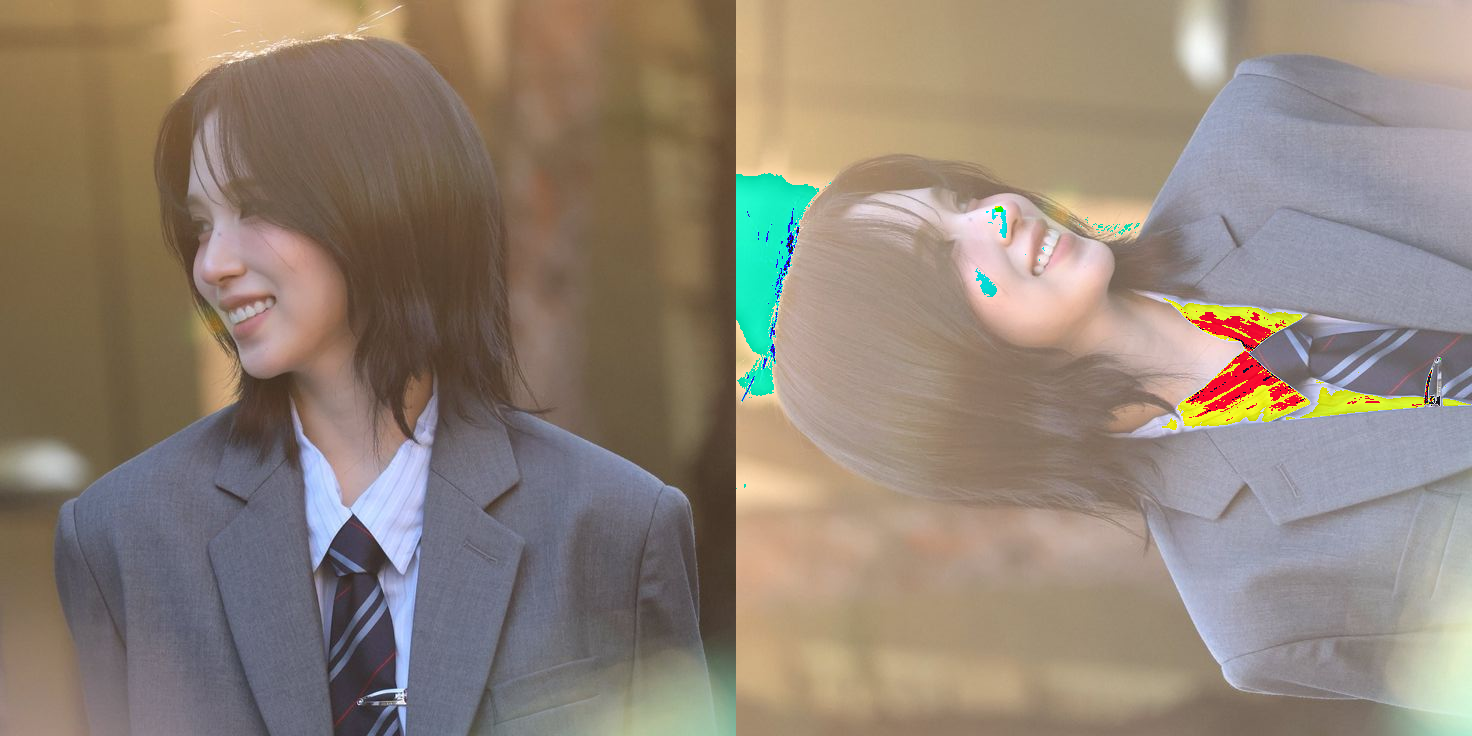

In [6]:
# Import Library
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[x,y,c] + brightness, 0, 255)

# cara simpel tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**---------- TUGAS ----------**

**1. Implement image inverse in your code using formula shown in the theoretical
background subsection above, giving the output shown in the following figure:**

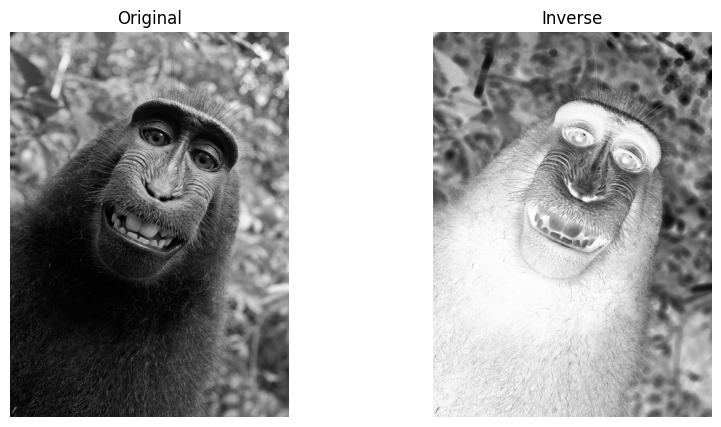

In [9]:
import cv2
import matplotlib.pyplot as plt

# Baca citra grayscale (atau bisa juga BGR → ubah dulu ke gray)
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/baboon.tiff', cv2.IMREAD_GRAYSCALE)

# Image inverse
L = 256
inverse_img = L - 1 - img

# Tampilkan hasil
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Inverse")
plt.imshow(inverse_img, cmap='gray')
plt.axis("off")

plt.show()


**2. Implement contrast transformation in Google Collaboratory using the formula written in the Theoretical background section, giving the output shown in the following figure:**

Masukkan kecerahan [-255 s/d 255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


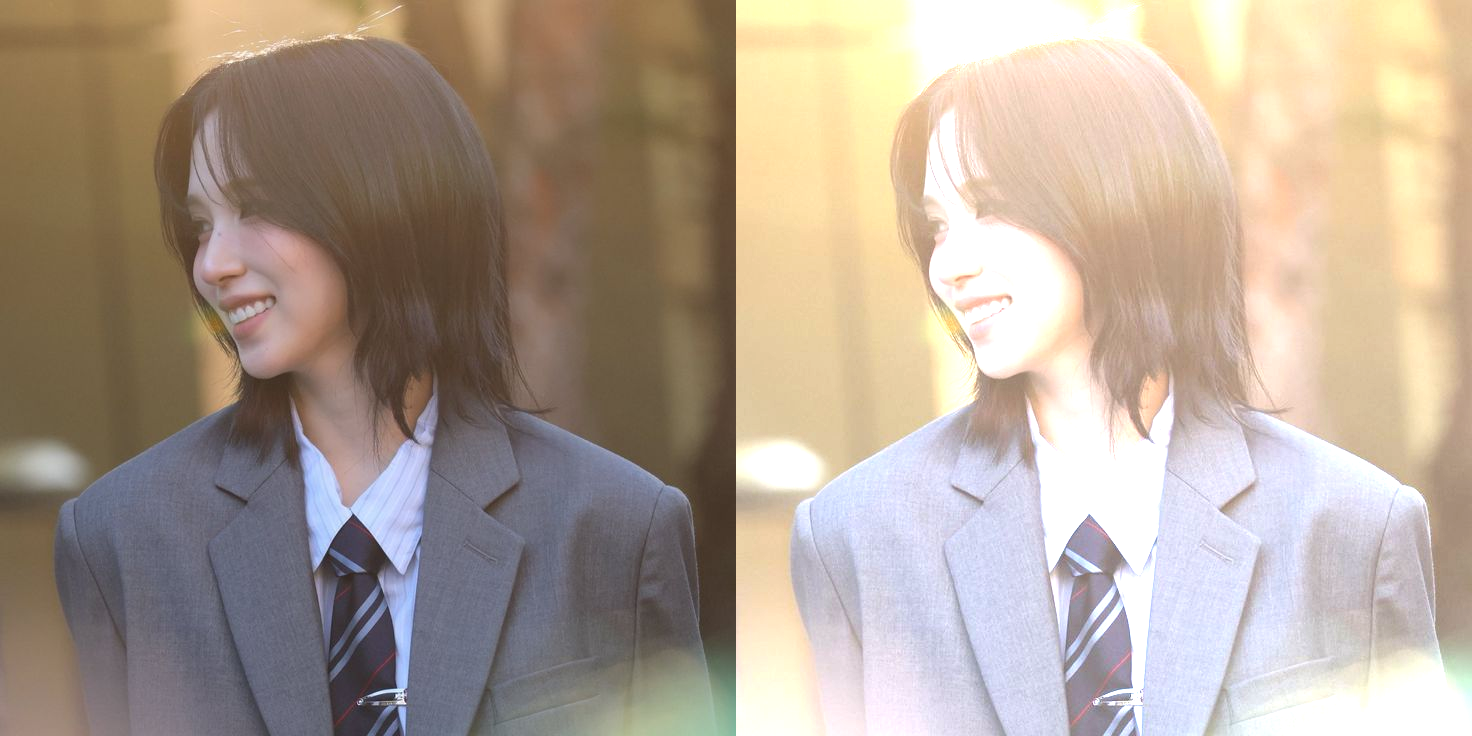

In [11]:
brightness = int(input("Masukkan kecerahan [-255 s/d 255]: "))
contrast   = float(input("Masukkan kontras [1.0 - 3.0]: "))

img = cv2.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

contrast_img = cv2.convertScaleAbs(img, alpha=contrast, beta=brightness)

result = cv2.hconcat([img, contrast_img])
cv2_imshow(result)


**3. Implement transformation of logarithmic brightness on Google Colaboratory using the
formula written in the Theoretical Background Reviews, generating output shown in
the following figure:**

Mengubah tingkat kecerahan citra dengan Transformasi Log
Masukkan nilai kecerahan: 40


/tmp/ipython-input-3445288271.py:7: RuntimeWarning: overflow encountered in scalar add
  c = brightness / np.log(1 + np.max(img))
/tmp/ipython-input-3445288271.py:7: RuntimeWarning: divide by zero encountered in log
  c = brightness / np.log(1 + np.max(img))


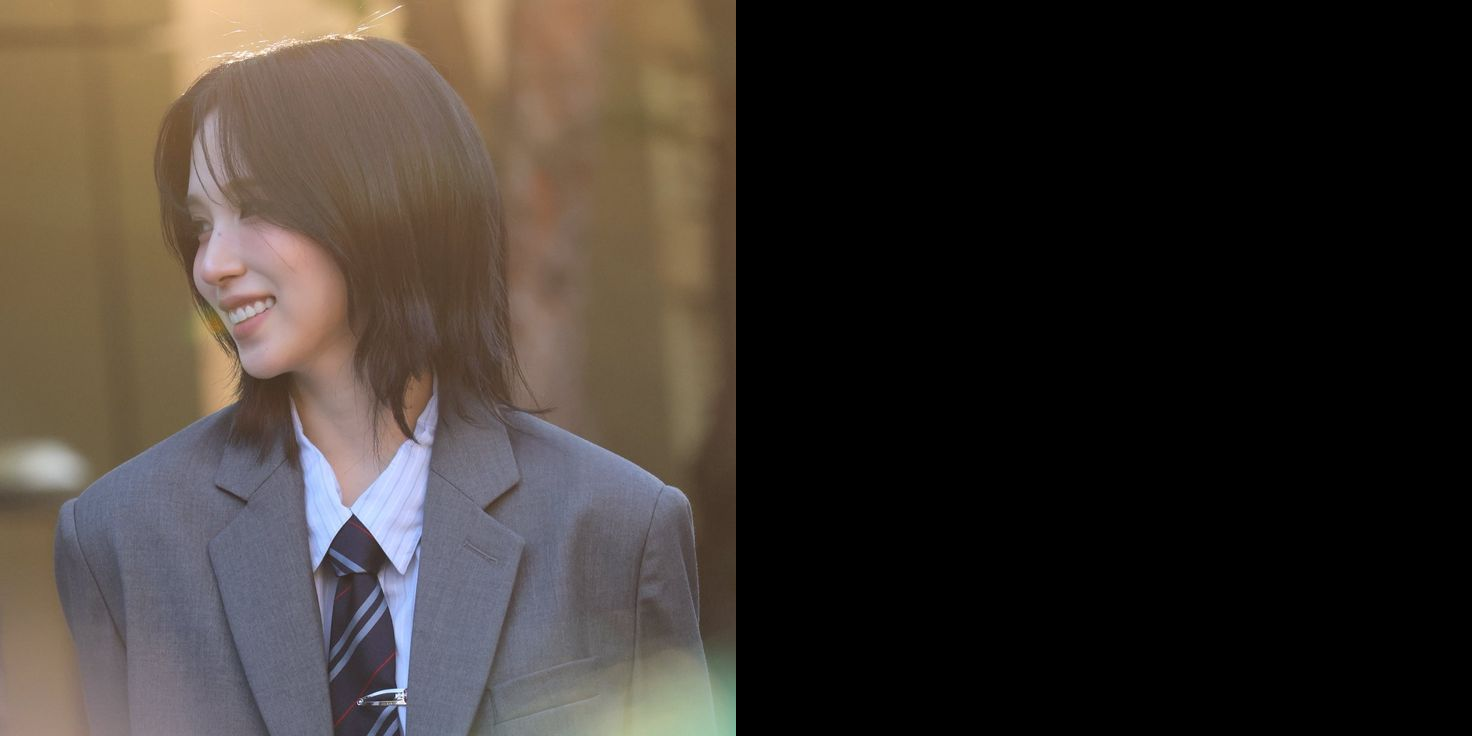

In [12]:
print("Mengubah tingkat kecerahan citra dengan Transformasi Log")
brightness = int(input("Masukkan nilai kecerahan: "))

img = cv2.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

# Transformasi Log
c = brightness / np.log(1 + np.max(img))
log_transform = c * (np.log(1 + img.astype(np.float32)))
log_transform = np.array(log_transform, dtype=np.uint8)

# Gabungkan citra asli dan hasil
result = cv2.hconcat([img, log_transform])
cv2_imshow(result)


**4. Implement grayscale transformation using the averaging, lightness, and luminance
method on Google Colaboratory using the formula written in the Theoretical
Background Reviews, generating output as follows :**

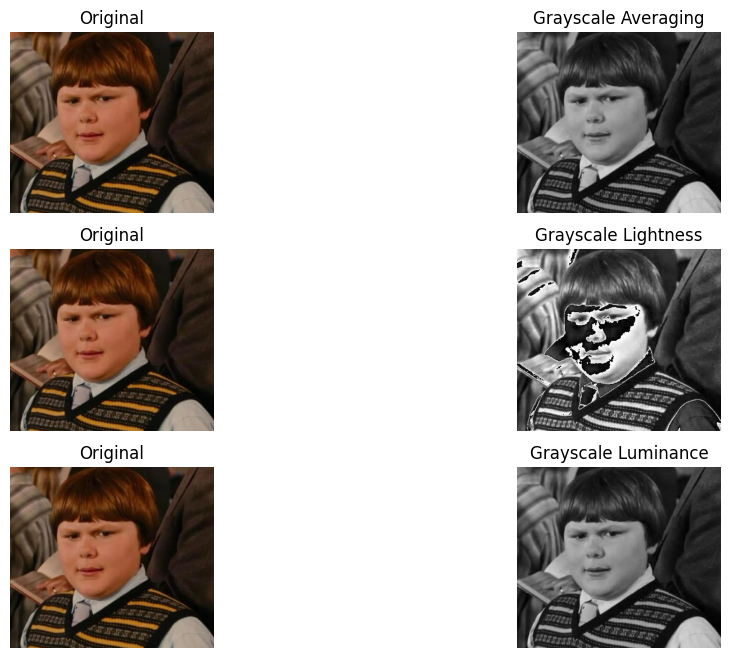

In [13]:
# Baca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 1. Averaging method
gray_avg = np.mean(img_rgb, axis=2).astype(np.uint8)

# 2. Lightness method
gray_lightness = ((np.max(img_rgb, axis=2) + np.min(img_rgb, axis=2)) / 2).astype(np.uint8)

# 3. Luminance method
gray_luminance = (0.2126*img_rgb[:,:,0] + 0.7152*img_rgb[:,:,1] + 0.0722*img_rgb[:,:,2]).astype(np.uint8)

# Tampilkan hasil
plt.figure(figsize=(12,8))

plt.subplot(3,2,1), plt.imshow(img_rgb), plt.title("Original")
plt.axis("off")
plt.subplot(3,2,2), plt.imshow(gray_avg, cmap='gray'), plt.title("Grayscale Averaging")
plt.axis("off")

plt.subplot(3,2,3), plt.imshow(img_rgb), plt.title("Original")
plt.axis("off")
plt.subplot(3,2,4), plt.imshow(gray_lightness, cmap='gray'), plt.title("Grayscale Lightness")
plt.axis("off")

plt.subplot(3,2,5), plt.imshow(img_rgb), plt.title("Original")
plt.axis("off")
plt.subplot(3,2,6), plt.imshow(gray_luminance, cmap='gray'), plt.title("Grayscale Luminance")
plt.axis("off")

plt.show()


**5. Show certain colors in the image , and change other colors to grayscale. For example , show the blue color in the image input and change the parts other which is not colored blue into grayscale as in the example below :**

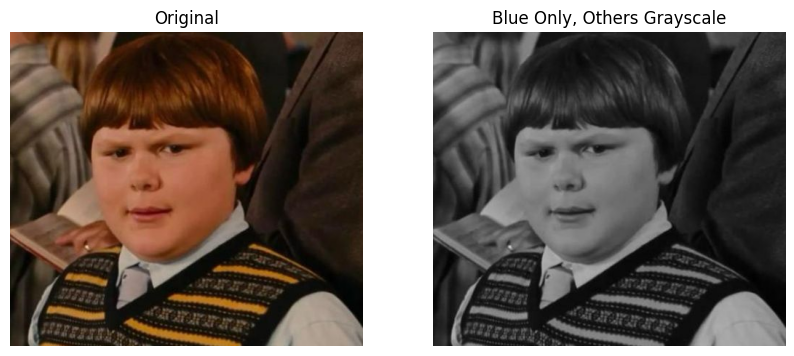

In [14]:
# Baca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Konversi ke HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Range warna biru (bisa disesuaikan)
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

# Mask untuk area biru
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bagian biru tetap berwarna
blue_part = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

# Ubah citra asli ke grayscale
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
gray_bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

# Gabungkan: bagian biru berwarna, sisanya grayscale
result = np.where(mask[:,:,None] != 0, img_rgb, gray_bgr)

# Tampilkan hasil
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(img_rgb), plt.title("Original")
plt.axis("off")
plt.subplot(1,2,2), plt.imshow(result), plt.title("Blue Only, Others Grayscale")
plt.axis("off")
plt.show()
